# Monte Carlo Methods

In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
#The next line is not useful if you use Python 3
from __future__ import print_function, division # bring the print function and division of Python3 to 2.7

### MonteCarlo simulation using Hit and Miss 

We can create functions with conditions for example:

In [5]:
def myfunction(x):
    if x < -1 or x > 1:
        return 0
    else:
        return 15./4. * (x**2 - x**4)
    
print (myfunction(3), myfunction(0.5))

0 0.703125


In [6]:
vmyfunction = np.vectorize(myfunction)
x = np.linspace(-1,1, 50)
y = vmyfunction(x)


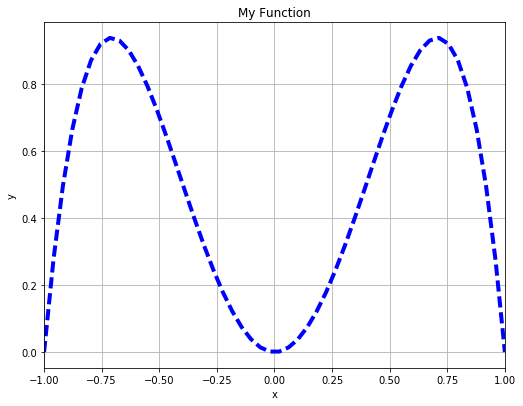

In [7]:
fig = plt.figure(figsize=(8,6))

#fig, ax = plt.subplots(figsize=(8,6)) Another way to generate figure and axes at the same time

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

ax.plot(x, y, 'b--', lw=4)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1,1)
ax.grid()
ax.set_title('My Function');

Now we are going to see the simulation of any user-defined function using the MonteCarlo. First we are going to use a method à la C, ie with loops etc. Then we will see the more <code> pythonic </code> way using vectorized functions

In [9]:
mc_events = 10000 #this is the number of randon numbers generated but not the ones we actually use!
ymax = np.max(y) # maximum from the function
print (ymax)


0.9371095376926283


In [13]:
print (np.random.rand())

0.0467506404011


In [105]:
data1 = []
for i in range(0, mc_events):
    rnd1 = np.random.rand()
    rnd2 = np.random.rand()
    yrnd = ymax*rnd1 # random number between 0, ymax
    xrnd = 2*rnd2 - 1 # random number between -1, 1
    if yrnd < myfunction(xrnd):
        data1.append(xrnd)
        

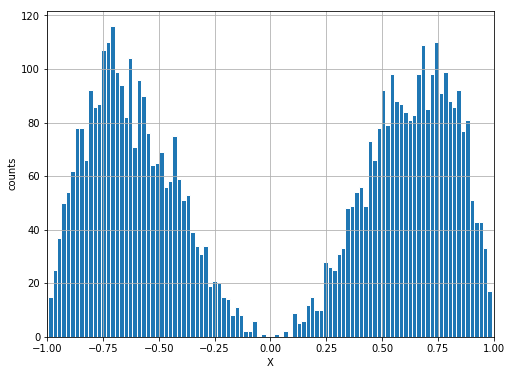

In [106]:
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.grid()
ax1.hist(data1,bins = 100, ec="white") #plot the data in a histogram with 100 bins
ax1.set_xlabel("X")
ax1.set_ylabel("counts")
ax1.set_xlim(-1,1)
plt.show()

Now with vectorized functions ie, without loops!

In [107]:
rnd1 = np.random.rand(mc_events) #array of mc_events randon numbers!
rnd2 = np.random.rand(mc_events) #array of mc_events randon numbers!
yrnd = ymax*rnd1 # array of mc_events size of y's (0, ymax)
xrnd = 2*rnd2 - 1 # array of mc_events size of x's (-1, 1)

In [108]:
yprime = vmyfunction(xrnd) # array of values of function evaluated at x's

print (len(yprime))


10000


In [109]:
np.where(yrnd < yprime)

(array([   4,    5,   10, ..., 9991, 9994, 9995]),)

In [110]:
data2 = xrnd[np.where(yrnd < yprime)]

print (len(data2))

5393


The function ```Python np.where(condition)``` is extremely useful, it returns the indexes, of the array that satisfy the ```condition``` between brackets

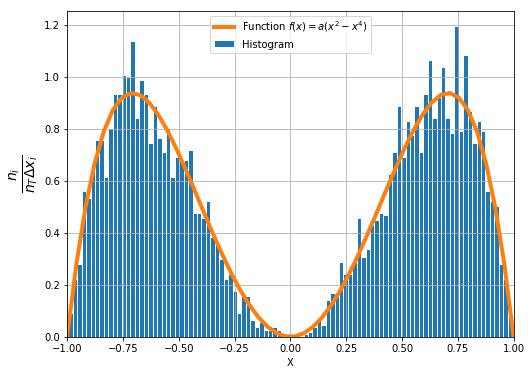

In [111]:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
ax2.hist(data2,bins = 100, normed = True, label="Histogram", ec='white') #plot the data in a histogram with 100 bins
ax2.plot(x, y, lw=4, label="Function $f(x) = a(x^2-x^4)$")
ax2.set_xlabel("X")
ax2.set_ylabel(r"$\frac{n_i}{n_{T}\Delta x_i}$", fontsize=20)
#ax2.plot(xrnd,yrnd, 'o')
ax2.set_xlim(-1,1)
ax2.legend()
plt.show()

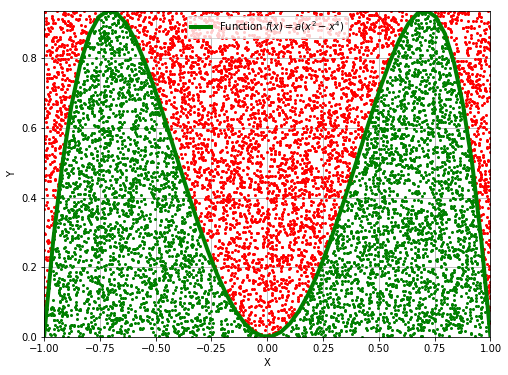

In [112]:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
#ax2.hist(data2,bins = 100, normed = True, label="Histogram") #plot the data in a histogram with 100 bins
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.plot(xrnd[np.where(yrnd < yprime)] ,yrnd[np.where(yrnd < yprime)], 'go', ms=2)
ax2.plot(xrnd[np.where(yrnd > yprime)] ,yrnd[np.where(yrnd > yprime)], 'ro', ms=2)
ax2.plot(x, y, color='green', lw=4, label="Function $f(x) = a(x^2-x^4)$")
ax2.set_xlim(-1,1)
ax2.set_ylim(0,ymax)
ax2.legend(loc="upper center")
plt.show()

### Inverse transformation 


To use this method we need to calculate the integral of our function as function of $x$, ie:


$$g(x) = \frac{1}{\pi \alpha\left(1 + \left(\frac{x - x_0}{\alpha}\right)^2\right)}$$

$$G(x) = \frac{1}{\pi} \arctan \left(\frac{x-x_0}{\alpha}\right) + \frac{1}{2}$$


$$G^{-1}(x) = \alpha \tan \left(\pi \left(x - \frac{1}{2}\right)\right) + x_0 $$

In [113]:
def cauchy(x):
    return 1./(np.pi *(1+ x**2))

def inv_G(x):
    return np.tan(np.pi*(x - 0.5))

x = np.linspace(-4, 4, 100)
y = cauchy(x)


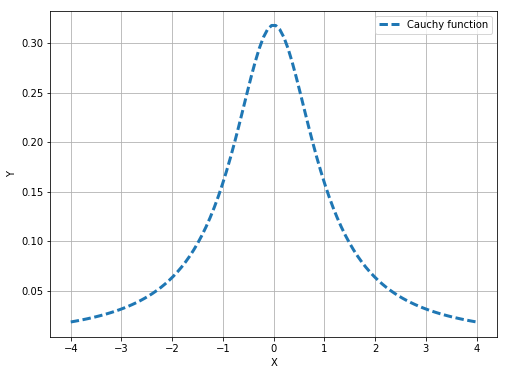

In [114]:
fig3, ax3 = plt.subplots(figsize=(8,6))
plt.grid()
ax3.plot(x, y, '--', lw=3, label="Cauchy function")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.legend()
plt.show()

In [115]:
rnd = np.random.rand(mc_events)
data3 = inv_G(rnd)

print (np.min(data3), np.max(data3))

-7340.90600145 1765.0799435


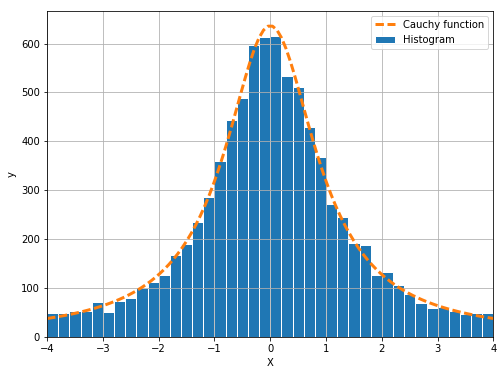

In [116]:
fig4, ax4 = plt.subplots(figsize=(8,6))
plt.grid()
binsedges = np.arange(-4,4.5,0.2) # we dont want to show the whole range from min(data3) to max(data3) only 
binswidth = np.diff(binsedges)[0]

ax4.hist(data3, bins = binsedges, normed = False, label="Histogram", ec="white") #plot the data in a histogram with 100 bins
ax4.plot(x, y * mc_events * binswidth, '--', lw=3, label="Cauchy function")

# The following does not work, since the normed = True only normalizes the histogram in the visible range!
#ax4.hist(data3, bins = binsedges, normed = True, label="Histogram") #plot the data in a histogram with 100 bins
#ax4.plot(x, y , '--', lw=3, label="Cauchy function")


ax4.set_xlabel("X")
ax4.set_ylabel("y")
ax4.set_xlim(-4,4)
ax4.legend()
plt.show()